<a href="https://colab.research.google.com/github/KothariRhythm/Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [ ]:
# loading the csv file to a pandas DataFrame
heart_data = pd.read_csv('/content/heart.csv')
heart_disease_data = pd.read_csv('/content/heart_disease_data.csv')

In [ ]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
print(heart_data.shape)
print(heart_disease_data.shape)

(918, 12)
(303, 14)


In [ ]:
heart_data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
heart_disease_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
heart_disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Label Encoding

In [ ]:
label_encode = LabelEncoder()

In [ ]:
labels_1 = label_encode.fit_transform(heart_data.Sex)
labels_2 = label_encode.fit_transform(heart_data.ChestPainType)
labels_3 = label_encode.fit_transform(heart_data.RestingECG)
labels_4 = label_encode.fit_transform(heart_data.ExerciseAngina)
labels_5 = label_encode.fit_transform(heart_data.ST_Slope)

In [ ]:
heart_data['Sex'] = labels_1
heart_data['ChestPainType'] = labels_2
heart_data['RestingECG'] = labels_3
heart_data['ExerciseAngina'] = labels_4
heart_data['ST_Slope'] = labels_5

In [ ]:
mean = [0,0,0,0,0,0,0,0,0,0,0]
mean[0] = heart_data['Age'].mean()
mean[1] = heart_data['Sex'].mean()
mean[2] = heart_data['ChestPainType'].mean()
mean[3] = heart_data['RestingBP'].mean()
mean[4] = heart_data['Cholesterol'].mean()
mean[5] = heart_data['FastingBS'].mean()
mean[6] = heart_data['RestingECG'].mean()
mean[7] = heart_data['MaxHR'].mean()
mean[8] = heart_data['ExerciseAngina'].mean()
mean[9] = heart_data['Oldpeak'].mean()
mean[10] = heart_data['ST_Slope'].mean()
print(mean)

[53.510893246187365, 0.789760348583878, 0.7810457516339869, 132.39651416122004, 198.7995642701525, 0.23311546840958605, 0.9891067538126361, 136.80936819172112, 0.40413943355119825, 0.8873638344226579, 1.3616557734204793]


In [ ]:
std = [0,0,0,0,0,0,0,0,0,0,0]
std[0] = heart_data['Age'].std()
std[1] = heart_data['Sex'].std()
std[2] = heart_data['ChestPainType'].std()
std[3] = heart_data['RestingBP'].std()
std[4] = heart_data['Cholesterol'].std()
std[5] = heart_data['FastingBS'].std()
std[6] = heart_data['RestingECG'].std()
std[7] = heart_data['MaxHR'].std()
std[8] = heart_data['ExerciseAngina'].std()
std[9] = heart_data['Oldpeak'].std()
std[10] = heart_data['ST_Slope'].std()
print(std)

[9.43261650673201, 0.4077008804691498, 0.956519383238432, 18.5141541199078, 109.38414455220348, 0.423045624739303, 0.6316714317993976, 25.4603341382503, 0.49099221882320604, 1.0665701510493257, 0.6070561850472695]


In [ ]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
heart_data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


Data Splitting

In [ ]:
x = heart_data.drop(columns = 'HeartDisease',axis=1)
y = heart_data['HeartDisease']
X = heart_disease_data.drop(columns = 'target', axis = 1)
Y = heart_disease_data['target']

In [ ]:
print(x)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [ ]:
print(y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify = y, random_state=2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=1)
X_train_knn, X_test_knn, Y_train_knn, Y_test_knn = train_test_split(X, Y, test_size=0.15, stratify = Y, random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)
print(X.shape,X_train.shape,X_test.shape)

(918, 11) (734, 11) (184, 11)
(303, 13) (242, 13) (61, 13)


In [ ]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)
X_train_knn_std = sc.fit_transform(X_train_knn)
X_test_knn_std = sc.fit_transform(X_test_knn)

In [ ]:
print(x_train_std[0])
print(X_train_knn_std[0])

[-0.47472805  0.51740017  1.23575223 -0.66570797 -0.09128896 -0.5427086
  0.00879233  0.08466603 -0.81742389  1.01718728 -0.6060388 ]
[-0.70964296  0.69066019  0.02278324 -1.21359381 -0.33216251 -0.41009977
  0.87542608  0.77801519 -0.68452277 -0.02820009 -2.3034441  -0.71419833
  1.18806473]


Logistic Regression Model

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluation

In [ ]:
#accuracy on testing data
X_test_prediction = model.predict(X_test)
test_data_accuracy_l = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print(test_data_accuracy_l)

0.8360655737704918


In [ ]:
print(confusion_matrix(X_test_prediction,Y_test))

[[22  4]
 [ 6 29]]


In [ ]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [ ]:
print(train_data_accuracy)

0.859504132231405


Logistic Regression on my model

In [ ]:
lr = LogisticRegression(max_iter = 900)

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=900)

In [ ]:
#accuracy on testing data
x_test_prediction_lr = lr.predict(x_test)
test_data_accuracy_lr = accuracy_score(x_test_prediction_lr,y_test)

In [ ]:
print(test_data_accuracy_lr)

0.8478260869565217


In [ ]:
#accuracy on training data
x_train_prediction_lr = lr.predict(x_train)
train_data_accuracy_lr = accuracy_score(x_train_prediction_lr,y_train)

In [ ]:
print(train_data_accuracy_lr)

0.8583106267029973


Decision Tree

In [ ]:
dt = DecisionTreeClassifier(max_depth = 5)

In [ ]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
x_test_prediction_dt = dt.predict(x_test)
test_data_accuracy_dt = accuracy_score(x_test_prediction_dt,y_test)

In [ ]:
print(test_data_accuracy_dt)

0.875


In [ ]:
print(confusion_matrix(x_test_prediction_dt,y_test))

[[72 13]
 [10 89]]


In [ ]:
x_train_prediction = dt.predict(x_train)
train_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [ ]:
print(train_data_accuracy)

0.8978201634877384


In [ ]:
dt.feature_importances_

array([0.018663  , 0.03227818, 0.05392846, 0.02564986, 0.09957979,
       0.02851767, 0.0269554 , 0.07857158, 0.06260374, 0.02530892,
       0.54794341])

In [ ]:
# input data in the model for testing on our own
# 45,F,ATA,130,237,0,Normal,170,N,0,Up,0
# 37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
input_data = (45,0,1,130,237,0,1,170,0,0,2)

input_data_as_numpy_array = np.asarray(input_data)

input_data_as_numpy_array_std = [0,0,0,0,0,0,0,0,0,0,0]

for i in range(11):
  input_data_as_numpy_array_std[i] = (input_data_as_numpy_array[i] - mean[i]) / std[i]

input_data_as_numpy_array_std_as_array = np.asarray(input_data_as_numpy_array_std)
#reshaping the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array_std_as_array.reshape(1,-1)

prediction = dt.predict(input_data_reshaped)

print(prediction)

[0]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (37,1,0,140,207,0,1,130,1,1.5,1)

input_data_as_numpy_array = np.asarray(input_data)

input_data_as_numpy_array_std = [0,0,0,0,0,0,0,0,0,0,0]

for i in range(11):
  input_data_as_numpy_array_std[i] = (input_data_as_numpy_array[i] - mean[i]) / std[i]

input_data_as_numpy_array_std_as_array = np.asarray(input_data_as_numpy_array_std)
#reshaping the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array_std_as_array.reshape(1,-1)

prediction = dt.predict(input_data_reshaped)

print(prediction)

[0]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
k_values = [i for i in range (1,51)]
scores = []

scaler = StandardScaler()
X_train_dt = scaler.fit_transform(x_train)

for k in k_values:
    d = DecisionTreeClassifier(max_depth=k)
    score = cross_val_score(d, X_train_dt, y_train, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

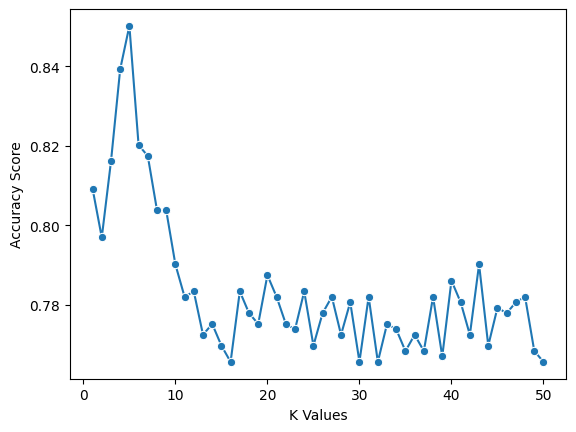

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(X_train_std,Y_train)

KNeighborsClassifier(n_neighbors=19)

In [ ]:
X_train_prediction_knn = knn.predict(X_train_std)
train_data_accuracy = accuracy_score(X_train_prediction_knn,Y_train)

In [ ]:
print(train_data_accuracy)

0.8305785123966942


In [ ]:
X_test_prediction_knn = knn.predict(X_test_std)
test_data_accuracy_knn = accuracy_score(X_test_prediction_knn,Y_test)

In [ ]:
print(test_data_accuracy_knn)

0.8524590163934426


In [ ]:
print(confusion_matrix(X_test_prediction_knn,Y_test))

[[22  3]
 [ 6 30]]


In [ ]:
k_values = [i for i in range (1,51)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std, Y_train)
    pred = knn.predict(X_test_std)
    score = accuracy_score(pred, Y_test)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

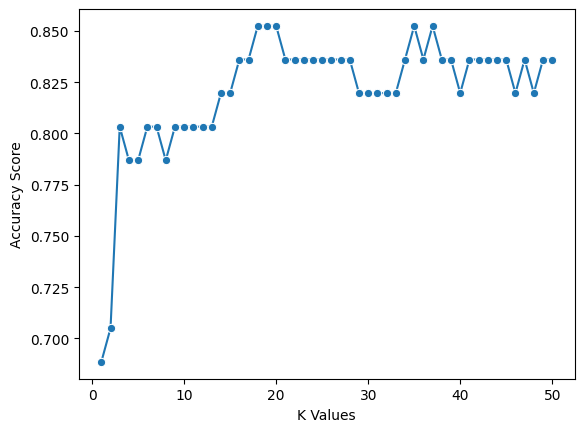

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

Random Forest

In [ ]:
rfc = RandomForestClassifier(max_depth=41)
rfc.fit(X_train_std,Y_train)

RandomForestClassifier(max_depth=41)

In [ ]:
X_test_prediction_rfc = rfc.predict(X_test_std)
test_data_accuracy_rfc = accuracy_score(X_test_prediction_rfc,Y_test)

In [ ]:
print(test_data_accuracy_rfc)

0.8032786885245902


In [ ]:
print(confusion_matrix(X_test_prediction_rfc,Y_test))

[[21  5]
 [ 7 28]]


In [ ]:
X_train_prediction_rfc = rfc.predict(X_train_std)

train_data_accuracy = accuracy_score(X_train_prediction_rfc,Y_train)

In [ ]:
print(train_data_accuracy)

1.0


In [ ]:
k_values = [i for i in range (1,51)]
scores_rf = []

for k in k_values:
    rf = RandomForestClassifier(max_depth=k)
    rf.fit(X_train_std, Y_train)
    pred = rf.predict(X_test_std)
    score = accuracy_score(pred, Y_test)
    scores_rf.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

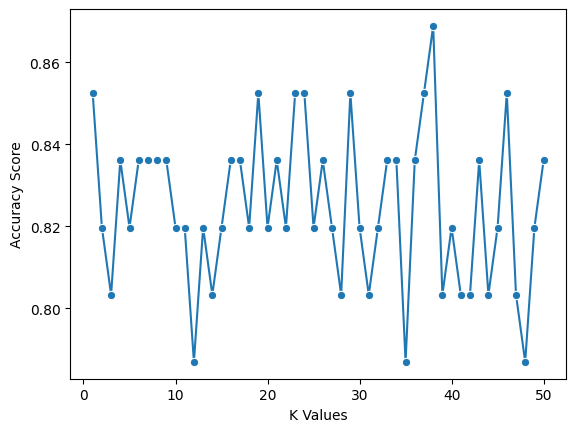

In [ ]:
sns.lineplot(x = k_values, y = scores_rf, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
# # input data in the model for testing on our own
# # 45,F,ATA,130,237,0,Normal,170,N,0,Up,0
# # 37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
# input_data = (45,0,1,130,237,0,1,170,0,0,2)

# input_data_as_numpy_array = np.asarray(input_data)

# #reshaping the numpy array as we are predicting for only one instance
# input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# prediction = rfc.predict(input_data_reshaped)

# print(prediction)

In [ ]:
# input_data_1 = (37,1,0,140,207,0,1,130,1,1.5,1)

# input_data_1_as_numpy_array = np.asarray(input_data_1)

# #reshaping the numpy array as we are predicting for only one instance
# input_data_1_reshaped = input_data_1_as_numpy_array.reshape(1,-1)

# prediction_1 = rfc.predict(input_data_1_reshaped)

# print(prediction_1)

SVM

In [ ]:
clf = svm.SVC()
clf.fit(x_train_std,y_train)

SVC()

In [ ]:
x_test_prediction_svm = clf.predict(x_test_std)
test_data_accuracy_svm = accuracy_score(x_test_prediction_svm,y_test)

In [ ]:
print(test_data_accuracy_svm)

0.8913043478260869


In [ ]:
x_test_prediction = []
for i in range(len(x_test)):
  if (((2*x_test_prediction_svm[i] + x_test_prediction_lr[i] + x_test_prediction_dt[i])/4.0) >= 0.5):
    x_test_prediction.append(1)
  else:
    x_test_prediction.append(0)


accuracy_overall = accuracy_score(x_test_prediction,y_test)
print(accuracy_overall)

0.8913043478260869


In [ ]:
k_values = [i for i in range (1,10)]
m_values = [i for i in range (1,10)]
n_values = [i for i in range (1,10)]
scores_rf = []

for k in k_values:
  for m in m_values:
    for n in n_values:
      x_test_prediction = []
      for i in range(len(x_test)):
        if (((k*x_test_prediction_svm[i] + m*x_test_prediction_lr[i] + n*x_test_prediction_dt[i])/float(k+m+n)) >= 0.5):
          x_test_prediction.append(1)
        else:
          x_test_prediction.append(0)
      score = accuracy_score(x_test_prediction,y_test)
      scores_rf.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

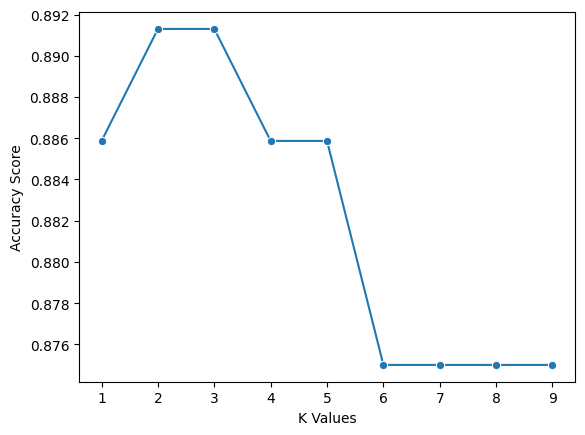

In [ ]:
t=[]
for k in k_values:
  t.append(scores_rf[160+k])

sns.lineplot(x = k_values, y = t, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
algorithms = ['Logistic Regression', 'Random Forest', 'KNN', '','Decision Tree','LR on my model','SVM classifier']
scores = [test_data_accuracy_l*100,test_data_accuracy_rfc*100,test_data_accuracy_knn*100,0,test_data_accuracy_dt*100,test_data_accuracy_lr*100,test_data_accuracy_svm*100]

Text(0.5, 1.0, 'Comparison')

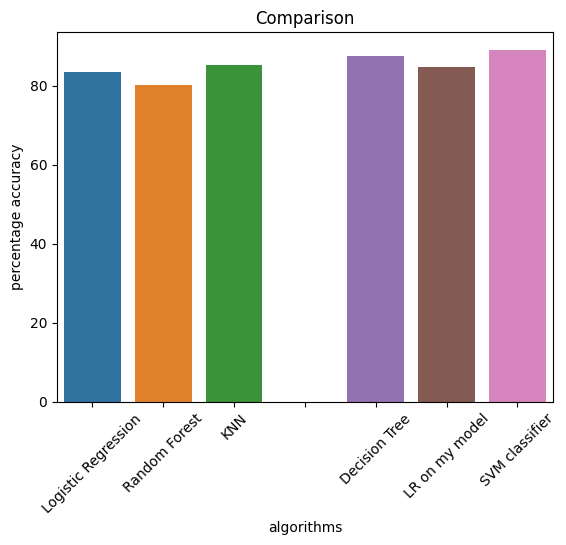

In [ ]:
sns.barplot(x = algorithms, y = scores)
plt.xticks(rotation = 45)
plt.xlabel('algorithms')
plt.ylabel('percentage accuracy')
plt.title('Comparison')

0 --> No heart disease

1 --> Heart disease

Text(0, 0.5, 'Total count')

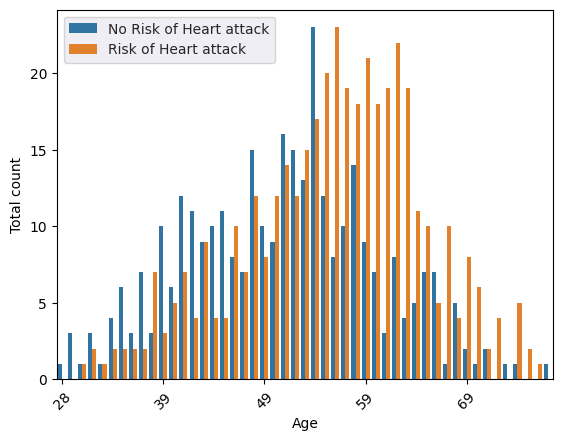

In [ ]:
sns.countplot(x = x_train['Age'], hue = x_train_prediction, )
sns.set_style("darkgrid")
plt.xticks(np.arange(0,50,step=10), rotation = 45)
legend = plt.legend(['No Risk of Heart attack','Risk of Heart attack'], ncol=1, fancybox=True)
plt.ylabel('Total count')

Text(0, 0.5, 'Total count')

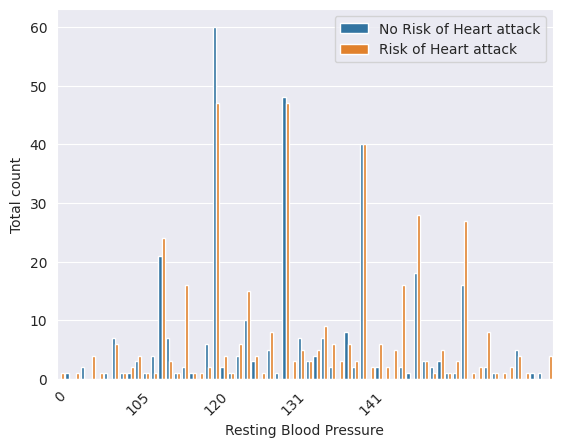

In [ ]:
sns.countplot(x = x_train['RestingBP'], hue = x_train_prediction, )
sns.set_style("darkgrid")
plt.xticks(np.arange(0,50,step=10), rotation = 45)
legend = plt.legend(['No Risk of Heart attack','Risk of Heart attack'], ncol=1, fancybox=True)
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Total count')

In [ ]:
heart_data['Sex'].value_counts()

1    725
0    193
Name: Sex, dtype: int64

In [ ]:
row1 = heart_data.Sex.where(heart_data.HeartDisease == 0)
print(row1.value_counts())
row2 = heart_data.Sex.where(heart_data.HeartDisease == 1)
print(row2.value_counts())

1.0    267
0.0    143
Name: Sex, dtype: int64
1.0    458
0.0     50
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Heart Disease')

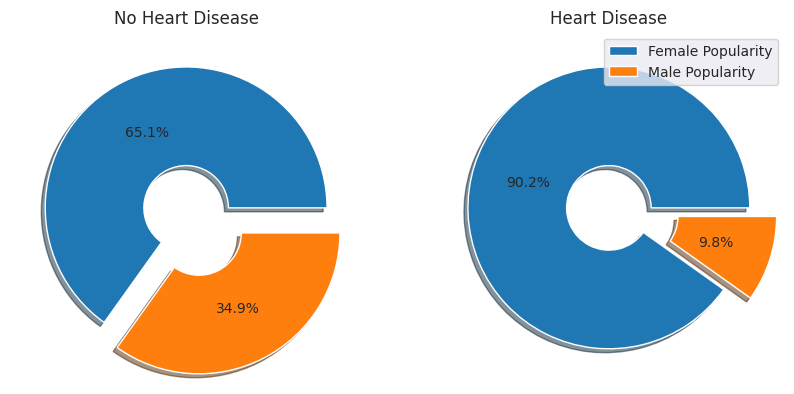

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,10))
ax0 = axes[0]
ax1 = axes[1]
ax0.pie(row1.value_counts(), wedgeprops=dict(width=.7), autopct = '%1.1f%%', explode = [0,0.2], shadow = True)
ax1.pie(row2.value_counts(), wedgeprops=dict(width=.7), autopct = '%1.1f%%', explode = [0,0.2], shadow = True)
legend = plt.legend(['Female Popularity','Male Popularity'], ncol=1, fancybox=True)
ax0.set_title('No Heart Disease')
ax1.set_title('Heart Disease')

1.0    149
2.0    131
0.0    104
3.0     26
Name: ChestPainType, dtype: int64
0.0    392
2.0     72
1.0     24
3.0     20
Name: ChestPainType, dtype: int64


Text(0.5, 1.0, 'Heart Disease')

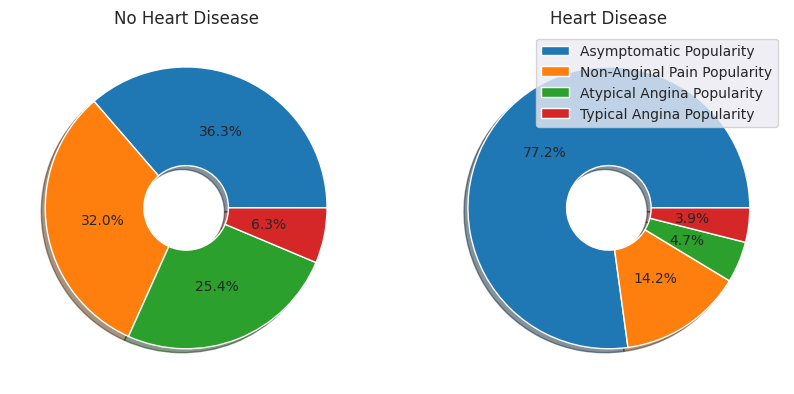

In [ ]:

row1 = heart_data.ChestPainType.where(heart_data.HeartDisease == 0)
print(row1.value_counts())
row2 = heart_data.ChestPainType.where(heart_data.HeartDisease == 1)
print(row2.value_counts())

fig, axes = plt.subplots(1,2, figsize=(10,10))
ax0 = axes[0]
ax1 = axes[1]
ax0.pie(row1.value_counts(), wedgeprops=dict(width=.7), autopct = '%1.1f%%', shadow = True)
ax1.pie(row2.value_counts(), wedgeprops=dict(width=.7), autopct = '%1.1f%%', shadow = True)
legend = plt.legend(['Asymptomatic Popularity', 'Non-Anginal Pain Popularity', 'Atypical Angina Popularity', 'Typical Angina Popularity'], ncol=1, fancybox=True)
ax0.set_title('No Heart Disease')
ax1.set_title('Heart Disease')


([<matplotlib.patches.Wedge at 0x7f7a013d7cd0>,
 [Text(-0.1835941114214546, 1.0845705151124876, 'No Heart Disease'),
  Text(0.2169748589526283, -1.2817651542238488, 'Heart Disease')],
 [Text(-0.10014224259352068, 0.5915839173340841, '55.3%'),
  Text(0.13352299012469432, -0.7887785564454455, '44.7%')])

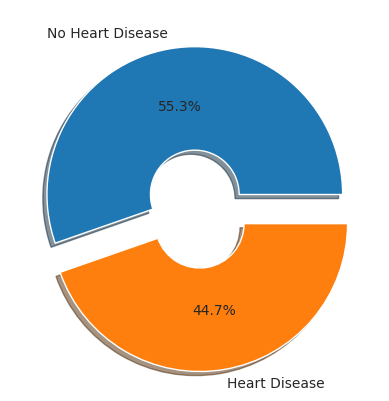

In [ ]:
plt.pie(heart_data.HeartDisease.value_counts(), wedgeprops=dict(width=.7), autopct = '%1.1f%%', labels = ['No Heart Disease', 'Heart Disease'], explode = [0,0.2], shadow = True)

Saving Train Models

In [ ]:
import pickle

In [ ]:
filename_1 = 'heart_disease_trained_model_rfc.sav'
filename_2 = 'heart_disease_trained_model_dt.sav'
filename_3 = 'heart_disease_trained_model_lr.sav'
filename_4 = 'StandardFunction.sav'

pickle.dump(rfc,open(filename_1,'wb'))
pickle.dump(dt,open(filename_2,'wb'))
pickle.dump(lr,open(filename_3,'wb'))
pickle.dump(sc,open(filename_4,'wb'))


In [ ]:
#loading saved model
load_model1 = pickle.load(open(filename_1,'rb'))
load_model2 = pickle.load(open(filename_2,'rb'))
load_model3 = pickle.load(open(filename_3,'rb'))
load_model4 = pickle.load(open(filename_4,'rb'))

In [ ]:
input_data = (45,0,1,130,237,0,1,170,0,0,2)
input_data = load_model4.fit_transform([input_data])

input_data_as_numpy_array = np.asarray(input_data)

#reshaping the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = load_model2.predict(input_data_reshaped)

print(prediction)

[0]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
for columns in x.columns:
  print(columns)

Age
Sex
ChestPainType
RestingBP
Cholesterol
FastingBS
RestingECG
MaxHR
ExerciseAngina
Oldpeak
ST_Slope
